# Build a spam classifier using Naive Bayes

## Project Description: 
- There are two datasets 
    - The ham-and-spam-dataset.zip dataset contains two folders with "good" (ham) and "bad" (spam) emails. 
    - If you rather prefer to work with messages, you can use SPAM text message 20170820 - Data.csv dataset.
- Use one of these datasets in order to build your own Naive Bayes classifier.
- Verify your Classifier using new email messages/emails (create your own messages).

## Project Duration: 2 weeks
## Project Deliverables:
1. End of the first week: 
    - Load the dataset using pandas, 
    - Analysis it, visualise
    - Prepare the dataset for the usage by Naive Bayes Classifier
2. End of the second week:
    - Train the classifier,
    - Validate it,
    - Apply it to new messages,
    - Try to cheat the classifier by adding "good words" to the end of your own message.

You can use the following link can be used as guidance for implementation:
https://towardsdatascience.com/spam-filtering-using-naive-bayes-98a341224038

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f788949af28>,
      dtype=object)

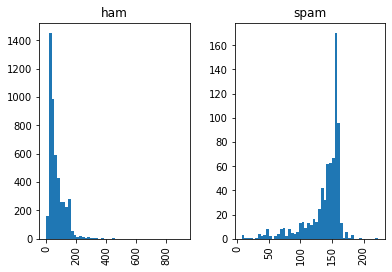

In [3]:

data = pd.read_csv('/home/srini/hbrs/Secondsem/machinlearning/Assignments/assignment2/SPAM text message 20170820 - Data.csv')

data = data.rename(columns={'v1': 'class','v2': 'text'})
data.head()
data.groupby('Category').describe()
data['length'] = data['Message'].apply(len)
data.hist(column='length', by='Category', bins=50)

In [4]:
def process_text(text):
    
    nopunctuation = [char for char in text if char not in string.punctuation]
    nopunctuation = ''.join(nopunctuation)
    
    cleaning_word = [words for words in nopunctuation.split() if words.lower() not in stopwords.words('english')]
        
    return cleaning_word


In [5]:
data['Message'].apply(process_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [6]:
msg_train, msg_test, cat_train, cat_test = \
train_test_split(data['Message'],data['Category'],test_size=0.2)

In [7]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])


In [8]:
pipeline.fit(msg_train,cat_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f7889286730>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [9]:
predictions = pipeline.predict(msg_test)

In [10]:
print(classification_report(cat_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       982
        spam       1.00      0.81      0.90       133

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



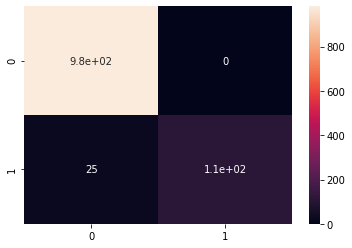

In [11]:
import seaborn as sns
sns.heatmap(confusion_matrix(cat_test,predictions),annot=True)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       1.00      0.87      0.93       147

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



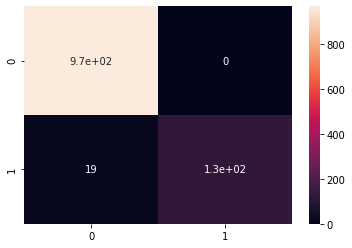

In [12]:
# for testing the classifier we used dataset from kaggle

test_csv = pd.read_csv('/home/srini/hbrs/Secondsem/machinlearning/Assignments/assignment2/spam.csv', encoding='latin-1')

# messages = pd.read_csv('../input/spam.csv', encoding='latin-1')
test_csv.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
test_csv = test_csv.rename(columns={'v1': 'class','v2': 'text'})
# print(test_csv)
test_csv.groupby('class').describe()
check =test_csv['text'].apply(process_text)
# print(check)
msg_train1, msg_test1, cat_train1, cat_test1 = \
train_test_split(test_csv['text'],test_csv['class'],test_size=0.2)

# print(msg_test1)
# print(check)
pred1 = pipeline.predict(msg_test1)
# for i in pred1:
#     print(i)
print(classification_report(cat_test1,pred1))
sns.heatmap(confusion_matrix(cat_test1,pred1),annot=True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

new_df = ['Hello Rose, hope u had a good vacation','You won the money lottery, claim it today. Pay','Find your horoscope for free','Montly rent and expenses details shared'],
        


vectorizer = CountVectorizer()
test_counts = vectorizer.transform(new_df)
actual_category = [1,0,0,1]
predictions = pipeline.predict(test_counts)
category = ['ham','spam']
predictions

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

Authors:

Shravanthi Arvind Patil <br>
Sreenivasa Hikkal Venugopala